In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Quick EDA

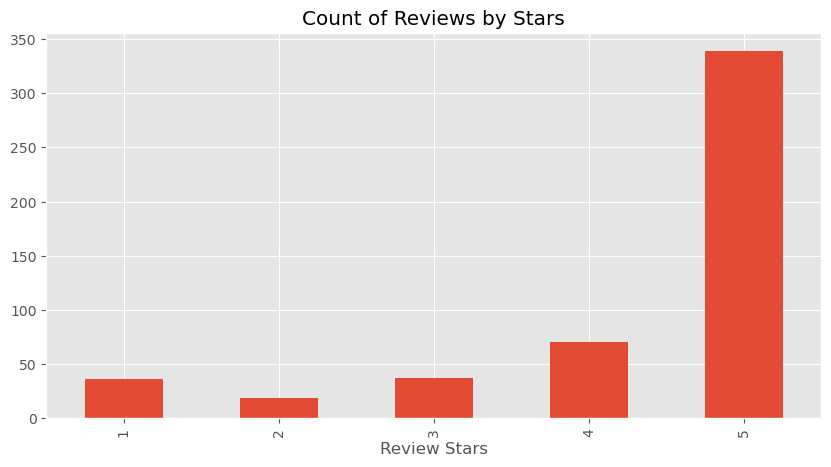

In [4]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar' ,
                                                  title='Count of Reviews by Stars',
                                                  figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## Basic NLTK

In [5]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [6]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [7]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [8]:
entitles = nltk.chunk.ne_chunk(tagged)
entitles.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## VADER SENTIMENT SCORING

In [9]:
pip install twython


Note: you may need to restart the kernel to use updated packages.


In [10]:

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [11]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [12]:
sia.polarity_scores('this is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [13]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

# Run the polarity score on yhe entire dataset

In [14]:
  !pip install ipywidgets

In [15]:
!jupyter labextension list

JupyterLab v3.4.8
/opt/conda/share/jupyter/labextensions
        nbdime-jupyterlab v2.1.1 enabled OK
        jupyterlab-jupytext v1.3.8+dev enabled OK (python, jupytext)
        jupyterlab_pygments v0.2.2 enabled OK (python, jupyterlab_pygments)
        jupyterlab-plotly v5.13.0 enabled OK
        jupyter-matplotlib v0.9.0 enabled OK
        jupyter-threejs v2.4.1 enabled OK (python, pythreejs)
        bqplot v0.5.38 enabled OK (python, bqplot)
        jupyter-vuetify v1.8.5 enabled OK
        jupyter-vue v1.9.0 enabled OK
        jupyterlab-datawidgets v7.1.2 enabled OK
        ipyvolume v0.6.1 enabled OK
        jupyter-webrtc v0.6.0 enabled OK
        jupyter-leaflet v0.17.2 enabled OK
        catboost-widget v1.0.0 enabled OK
        @jupyter-widgets/jupyterlab-manager v5.0.5 enabled OK (python, jupyterlab_widgets)
        @jupyterlab/server-proxy v3.2.2 enabled OK
        @jupyterlab/git v0.41.0 enabled OK (python, jupyterlab-git)
        @krassowski/jupyterlab-lsp v3.10.2 enabled

In [16]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

-\|/-\|/-\|/-\|/-\|/-\|/-\|Building jupyterlab assets (production, minimized)
-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/

In [17]:
!jupyter labextension list

JupyterLab v3.4.8
/opt/conda/share/jupyter/labextensions
        nbdime-jupyterlab v2.1.1 enabled OK
        jupyterlab-jupytext v1.3.8+dev enabled OK (python, jupytext)
        jupyterlab_pygments v0.2.2 enabled OK (python, jupyterlab_pygments)
        jupyterlab-plotly v5.13.0 enabled OK
        jupyter-matplotlib v0.9.0 enabled OK
        jupyter-threejs v2.4.1 enabled OK (python, pythreejs)
        bqplot v0.5.38 enabled OK (python, bqplot)
        jupyter-vuetify v1.8.5 enabled OK
        jupyter-vue v1.9.0 enabled OK
        jupyterlab-datawidgets v7.1.2 enabled OK
        ipyvolume v0.6.1 enabled OK
        jupyter-webrtc v0.6.0 enabled OK
        jupyter-leaflet v0.17.2 enabled OK
        catboost-widget v1.0.0 enabled OK
        @jupyter-widgets/jupyterlab-manager v5.0.5 enabled OK (python, jupyterlab_widgets)
        @jupyterlab/server-proxy v3.2.2 enabled OK
        @jupyterlab/git v0.41.0 enabled OK (python, jupyterlab-git)
        @krassowski/jupyterlab-lsp v3.10.2 enabled

In [18]:
!pip install --upgrade ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.2/198.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.4
    Uninstalling widgetsnbextension-3.6.4:
      Successfully uninstalled widgetsnbextension-3.6.4
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.5
    Uninstalling jupyterlab-widgets-3.0.5:
      Successfully uninstalled jupyterlab-widgets-3.0.5
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [19]:
res = {}
for i,row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [20]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index' : 'Id'})
vaders = vaders.merge(df, how='left')

In [21]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plot VADER results

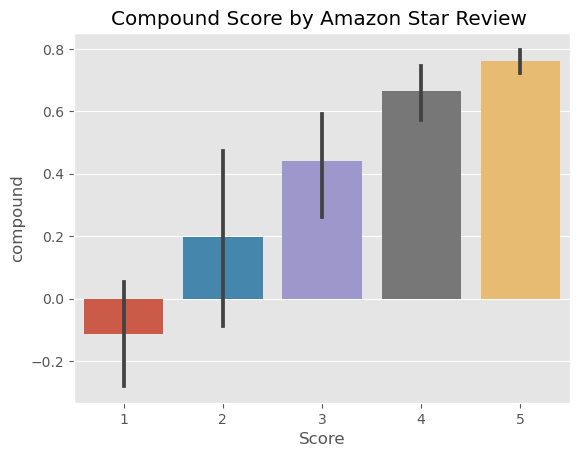

In [22]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review ')
plt.show()

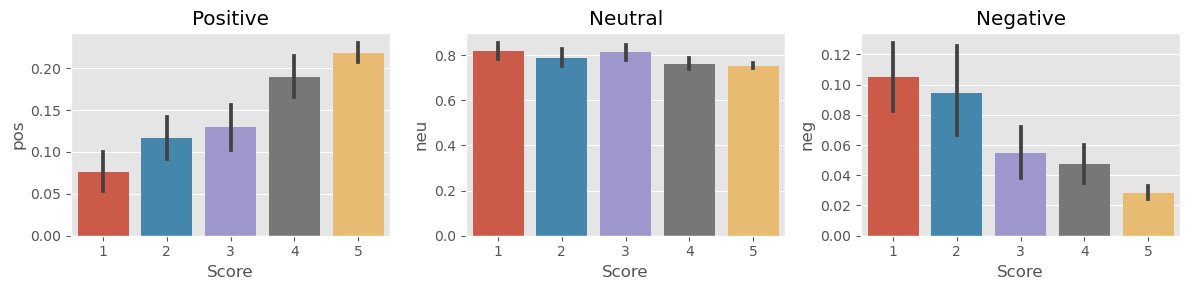

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score' , y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score' , y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score' , y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## ROBERTS PRETRAINED MODEL

In [24]:
# Transformer based deep earning model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [25]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [26]:
#VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [27]:
# Run for roberta model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
    
}
print(scores_dict)

{'roberta_neg': 0.9763551, 'roberta_neu': 0.020687457, 'roberta_pos': 0.0029573687}


In [28]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2] 
}
    return scores_dict

In [29]:
res = {}
for i,row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both 
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [30]:
results_df = pd.DataFrame(res).T
results_df = vaders.reset_index().rename(columns={'index' : 'Id'})
results_df = vaders.merge(df, how='left')

In [31]:
results_df.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Compare scores between models

In [32]:
results_df.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

Combine and compare

KeyError: 'vader_neg'

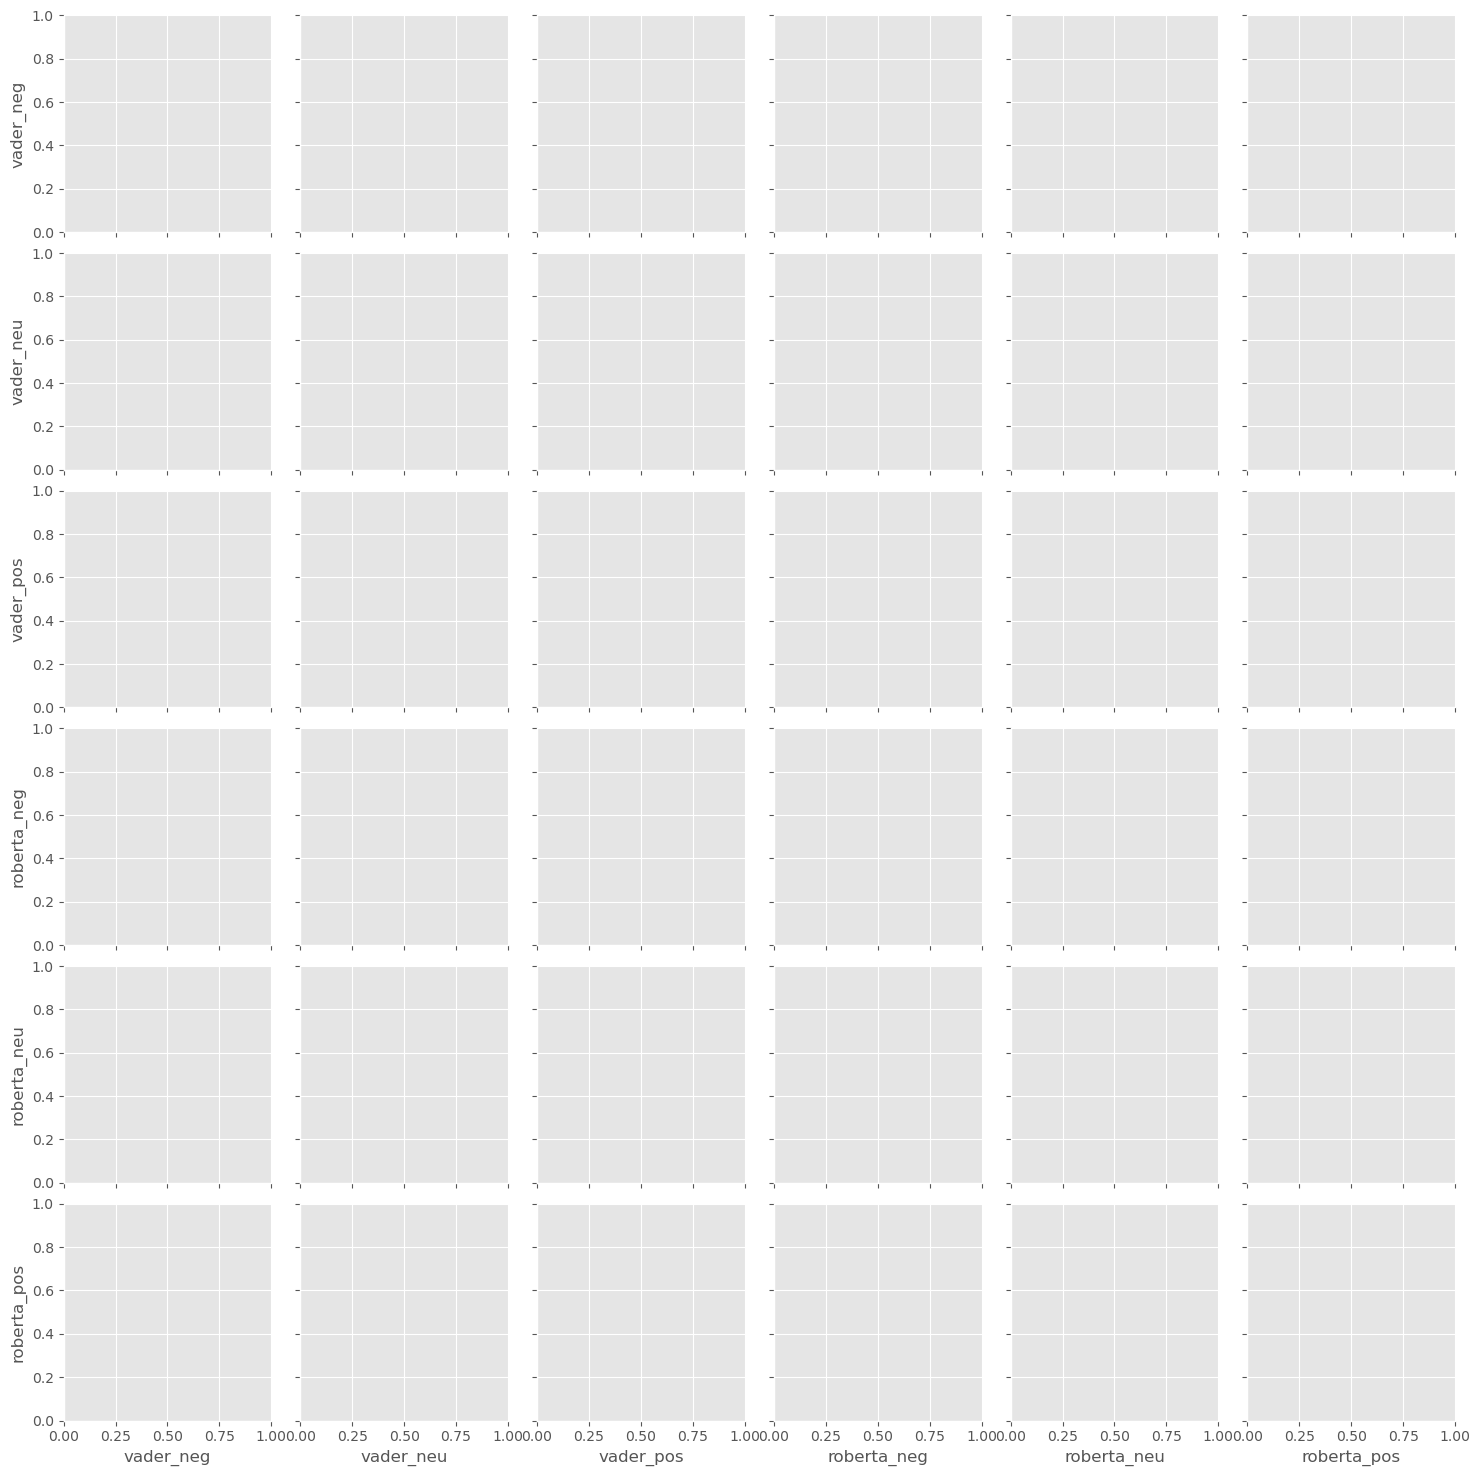

In [33]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos', 
                 'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

Review

In [ ]:
results_df.query('Score==4')\
.sort_values('roberta_neg',ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score==1')\
.sort_values('roberta_pos',ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score==5')\
.sort_values('vader_pos',ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score==4')\
.sort_values('vader_neu',ascending=False)['Text'].values[0]

## HUGGING FACE TRANSFORMER

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline('sentiment-analysis')


In [ ]:
sent_pipeline('Today is a bad day')

In [ ]:
sent_pipeline('Really impressed by your work')

In [ ]:
sent_pipeline('Not a good experience disappointed by your management')